## YOLOV9 Format

In [24]:
## Function to get a df in YOLOV9 format from the .xml file names
def getting_df(name):
    xml_dir = "./VOC2007/Annotations"
    xml_path = f"{xml_dir}/{name}.xml"
    
    _, normd_df, _, _ = xml_to_df(xml_path)

    return normd_df


random_train = train.sample(n=1).values[0][0]
getting_df(random_train)

,name,xmin,ymin,xmax,ymax
0,hook,0.420370,0.008854,0.651852,0.167708
1,hook,0.400000,0.385937,0.430556,0.403646
2,slogan,0.930556,0.453125,1.000000,0.494792
3,slogan,0.018519,0.527604,0.083333,0.537500
4,person,0.791667,0.666146,0.848148,0.756250
5,person,0.487963,0.761979,0.608333,0.821875
6,person,0.221296,0.748437,0.357407,0.830208
7,person,0.147222,0.659375,0.185185,0.686458
8,person,0.004630,0.683854,0.079630,0.763021
9,person,0.050926,0.659896,0.103704,0.725521


In [19]:
encoding_key = pd.DataFrame(["person", "vest", "helmet", "board", "wood", "rebar", 
                             "brick", "scaffold", "handcart", "cutter", "ebox", #ebox = electric box
                             "hopper", "hook", "fence", "slogan"])

# Convert the DataFrame to a dictionary
encoding_key = encoding_key.reset_index().set_index(0)['index'].to_dict()
encoding_key

{'person': 0,
 'vest': 1,
 'helmet': 2,
 'board': 3,
 'wood': 4,
 'rebar': 5,
 'brick': 6,
 'scaffold': 7,
 'handcart': 8,
 'cutter': 9,
 'ebox': 10,
 'hopper': 11,
 'hook': 12,
 'fence': 13,
 'slogan': 14}

### Creating the .txt label files:

In [ ]:
for i in range(train.shape[0]):

    xml_name = train.iloc[i][0]

    df = getting_df(xml_name)
    df['name'] = df['name'].map(encoding_key)

    df.to_csv(f'../YOLOV9_format/train/labels/{xml_name}.txt', sep=' ', index=False, header=False)

In [ ]:
for i in range(test.shape[0]):

    xml_name = test.iloc[i][0]

    df = getting_df(xml_name)
    df['name'] = df['name'].map(encoding_key)

    df.to_csv(f'../YOLOV9_format/test/labels/{xml_name}.txt', sep=' ', index=False, header=False)

## Moving images to dedicated train and test folders

In [13]:
import os
import shutil

# Define paths
train_txt = 'VOC2007/ImageSets/train.txt'
test_txt = 'VOC2007/ImageSets/test.txt'
images_folder = 'VOC2007/Images'
train_folder = 'VOC2007/train/images'
test_folder = 'VOC2007/test/images'



In [14]:
# Move train images
with open(train_txt, 'r', encoding='latin-1') as file:
    for line in file:
        image_name = line.strip() + '.jpg'
        src_path = os.path.join(images_folder, image_name)
        dst_path = os.path.join(train_folder, image_name)
        if os.path.exists(src_path):
            shutil.move(src_path, dst_path)
        else:
            print(f"Image {image_name} not found in {images_folder}")
            
print("Images have been moved successfully.")

Image hptm2969¸Ä.jpg not found in VOC2007/Images
Image hptm2970¸Ä.jpg not found in VOC2007/Images
Images have been moved successfully.


In [15]:
# Move test images
with open(test_txt, 'r', encoding='latin-1') as file:
    for line in file:
        image_name = line.strip() + '.jpg'
        src_path = os.path.join(images_folder, image_name)
        dst_path = os.path.join(test_folder, image_name)
        if os.path.exists(src_path):
            shutil.move(src_path, dst_path)
        else:
            print(f"Image {image_name} not found in {images_folder}")

print("Images have been moved successfully.")


Image hptm2967¸Ä.jpg not found in VOC2007/Images
Images have been moved successfully.


These weirdly-named images have been addresses as well!!

## Moving the annotations to the dedicated directories

In [16]:
import os
import shutil

# Define paths
train_txt = 'VOC2007/ImageSets/train.txt'
test_txt = 'VOC2007/ImageSets/test.txt'
annotations_folder = 'VOC2007/Annotations'
train_folder = 'VOC2007/train/xmls'
test_folder = 'VOC2007/test/xmls'

In [17]:
# Move train xml
with open(train_txt, 'r', encoding='latin-1') as file:
    for line in file:
        file_name = line.strip() + '.xml'
        src_path = os.path.join(annotations_folder, file_name)
        dst_path = os.path.join(train_folder, file_name)
        if os.path.exists(src_path):
            shutil.move(src_path, dst_path)
        else:
            print(f"XML {file_name} not found in {annotations_folder}")
            
print(".xml have been moved successfully.")

XML hptm2969¸Ä.xml not found in VOC2007/Annotations
XML hptm2970¸Ä.xml not found in VOC2007/Annotations
.xml have been moved successfully.


In [18]:
# Move test xml
with open(test_txt, 'r', encoding='latin-1') as file:
    for line in file:
        file_name = line.strip() + '.xml'
        src_path = os.path.join(annotations_folder, file_name)
        dst_path = os.path.join(test_folder, file_name)
        if os.path.exists(src_path):
            shutil.move(src_path, dst_path)
        else:
            print(f"XML {file_name} not found in {annotations_folder}")

print(".xml files have been moved successfully.")

XML hptm2967¸Ä.xml not found in VOC2007/Annotations
.xml files have been moved successfully.


## Important information

### To view images

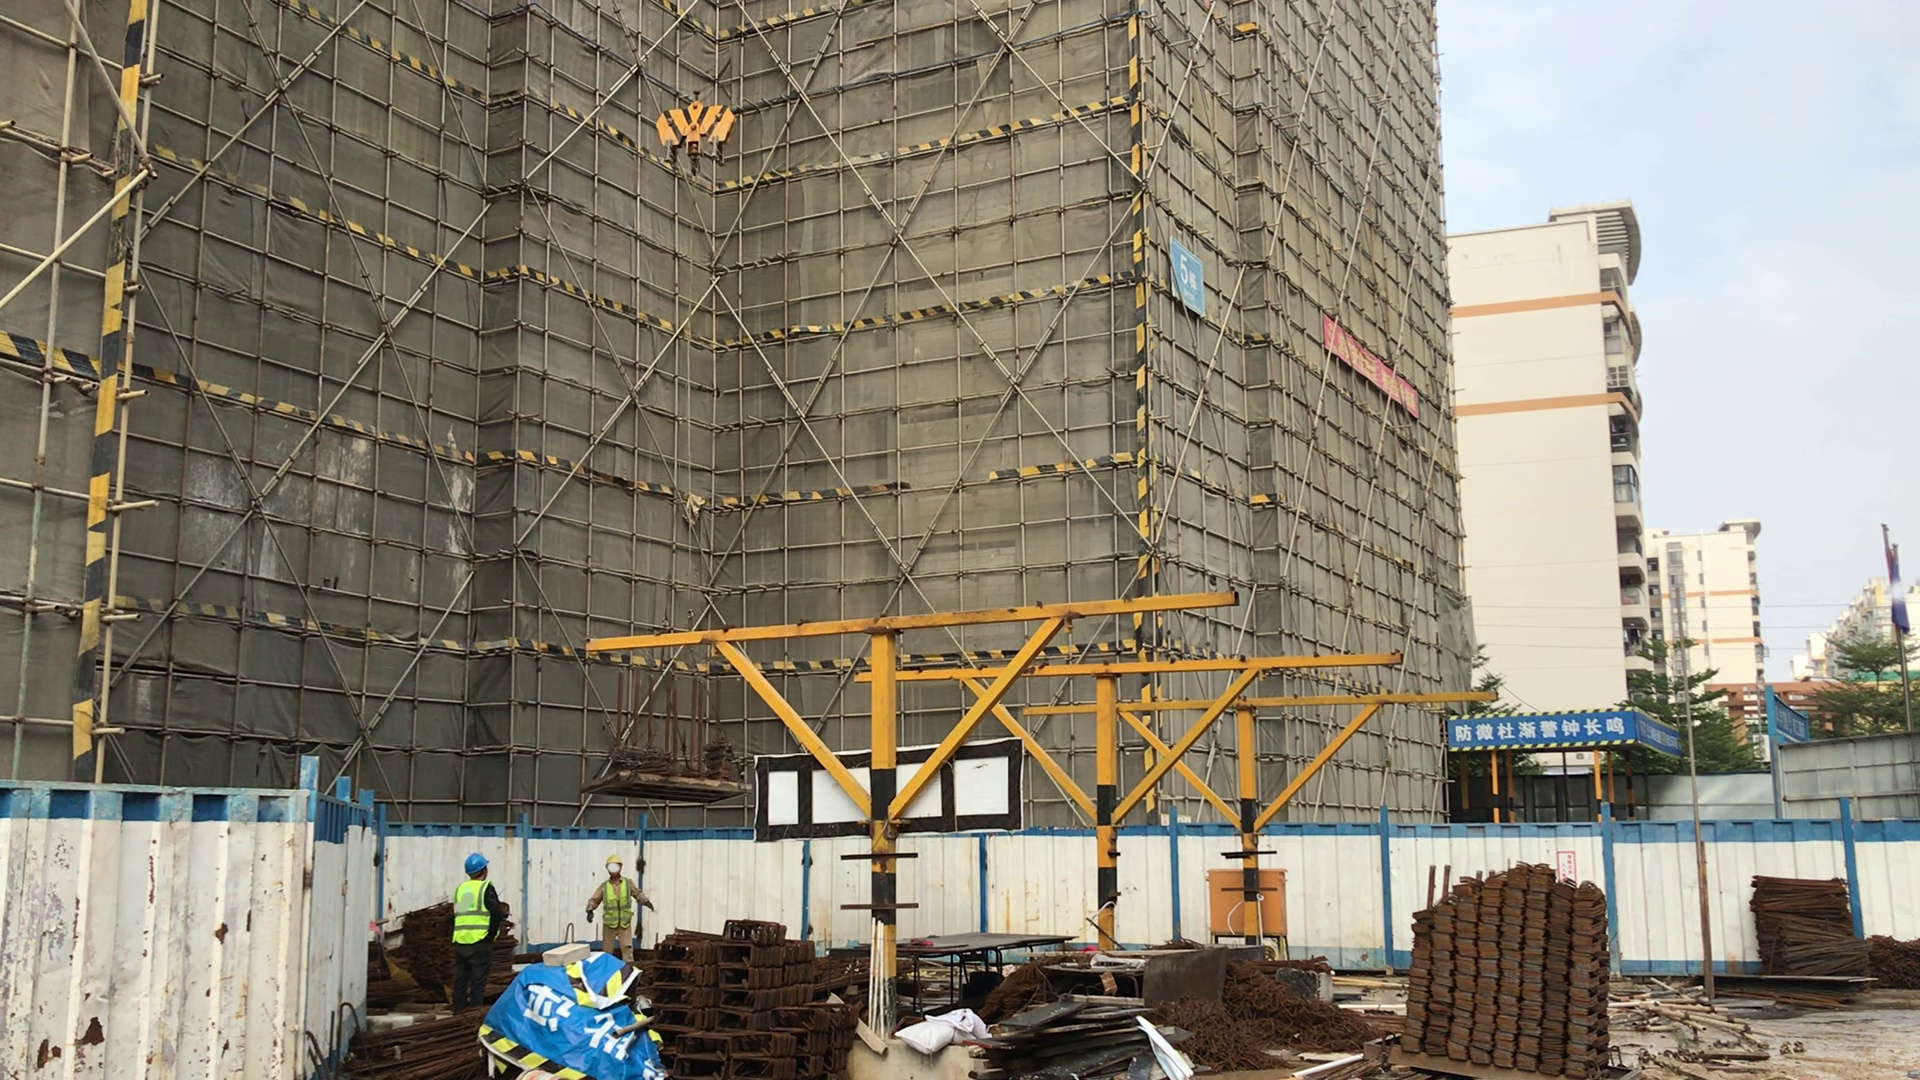

In [4]:
from PIL import Image

def read_image_file(path):
    img = Image.open(path)
    return img

path = "Data/VOC2007/test/images/hd11.jpg"
img = read_image_file(path)

# Now you can use the img object for further processing
img

In [5]:
import pandas as pd

encoding_key = pd.DataFrame(["person", "vest", "helmet", "board", "wood", "rebar", 
                             "brick", "scaffold", "handcart", "cutter", "ebox", #ebox = electric box
                             "hopper", "hook", "fence", "slogan"])

# Convert the DataFrame to a dictionary
encoding_key = encoding_key.reset_index().set_index(0)['index'].to_dict()
encoding_key

{'person': 0,
 'vest': 1,
 'helmet': 2,
 'board': 3,
 'wood': 4,
 'rebar': 5,
 'brick': 6,
 'scaffold': 7,
 'handcart': 8,
 'cutter': 9,
 'ebox': 10,
 'hopper': 11,
 'hook': 12,
 'fence': 13,
 'slogan': 14}

In [6]:
# import pandas as pd
import xml.etree.ElementTree as ET

def xml_to_df(path):
    ## Read/Parse the XML file
    tree = ET.parse(path)
    root = tree.getroot()

    ## Get the width and height of the image
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)

    ## Make it a dataframe
    data = []
    normalized_data = []
    for obj in root.findall('object'):
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        data.append([name, xmin, ymin, xmax, ymax])

        # Normalized coordinates
        xmin_norm = xmin / width
        ymin_norm = ymin / height
        xmax_norm = xmax / width
        ymax_norm = ymax / height

        normalized_data.append([name, xmin_norm, ymin_norm, xmax_norm, ymax_norm])

    df = pd.DataFrame(data, columns=['name', 'xmin', 'ymin', 'xmax', 'ymax'])
    normalized_df = pd.DataFrame(normalized_data, columns=['name', 'xmin', 'ymin', 'xmax', 'ymax'])
    return df, normalized_df, width, height

hd11_path = "Data/VOC2007/train/xmls/hd01.xml"
hd11_df, hd11_normalized_df, width, height = xml_to_df(hd11_path)
print(hd11_df)
print(hd11_normalized_df)
print("Width:", width)
print("Height:", height)

   name  xmin  ymin  xmax  ymax
0  hook  1690   747  2103  1296
   name      xmin      ymin      xmax      ymax
0  hook  0.419147  0.247024  0.521577  0.428571
Width: 4032
Height: 3024


In [7]:
import os

# Function to encode class names and write to .txt file
def write_txt_from_df(normalized_df, txt_path):
    with open(txt_path, 'w') as f:
        for _, row in normalized_df.iterrows():
            class_id = encoding_key.get(row['name'], -1)
            if class_id == -1:
                print(f"Warning: {row['name']} not found in encoding key")
            else:
                f.write(f"{class_id} {row['xmin']} {row['ymin']} {row['xmax']} {row['ymax']}\n")


In [8]:
## Test files

# Paths
xml_folder = 'Data/VOC2007/test/xmls'
txt_folder = 'Data/VOC2007/test/labels'

# Create txt_folder if it does not exist
os.makedirs(txt_folder, exist_ok=True)

# Process each XML file in the folder
for xml_file in os.listdir(xml_folder):
    if xml_file.endswith('.xml'):
        xml_path = os.path.join(xml_folder, xml_file)
        txt_path = os.path.join(txt_folder, xml_file.replace('.xml', '.txt'))
        
        # Parse XML and get DataFrame
        _, normalized_df, _, _ = xml_to_df(xml_path)
        
        # Write to .txt file
        write_txt_from_df(normalized_df, txt_path)


In [9]:
## Train files

# Paths
xml_folder = 'Data/VOC2007/train/xmls'
txt_folder = 'Data/VOC2007/train/labels'

# Process each XML file in the folder
for xml_file in os.listdir(xml_folder):
    if xml_file.endswith('.xml'):
        xml_path = os.path.join(xml_folder, xml_file)
        txt_path = os.path.join(txt_folder, xml_file.replace('.xml', '.txt'))
        
        # Parse XML and get DataFrame
        _, normalized_df, _, _ = xml_to_df(xml_path)
        
        # Write to .txt file
        write_txt_from_df(normalized_df, txt_path)